# Network Visualisations: Purchases of political books in the US

*I downloaded the data from here: https://networkdata.ics.uci.edu/data.php?id=8.* *The original source is: http://www.orgnet.com/. I found some useful ideas in this blog: https://blog.dominodatalab.com/social-network-analysis-with-networkx/.*

I created this notebook for the second assignment of the Data Visualisation course on coursera. The dataset represents a network of books purchased on Amazon about recent US politics. Two nodes are connected if a customer purchased both books.

In [1]:
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
import numpy as np

import networkx as nx
from networkx import drawing

# 1. Read the data in

In [3]:
H = nx.read_gml('data/polbooks/polbooks.gml', True)

In [4]:
print(nx.info(H))

Name: ()
Type: Graph
Number of nodes: 105
Number of edges: 441
Average degree:   8.4000


Example node:

In [5]:
H.nodes(data=True)[0]

("All the Shah's Men", {'id': 28, 'label': "All the Shah's Men", 'value': 'n'})

A first glimpse of the data structure:

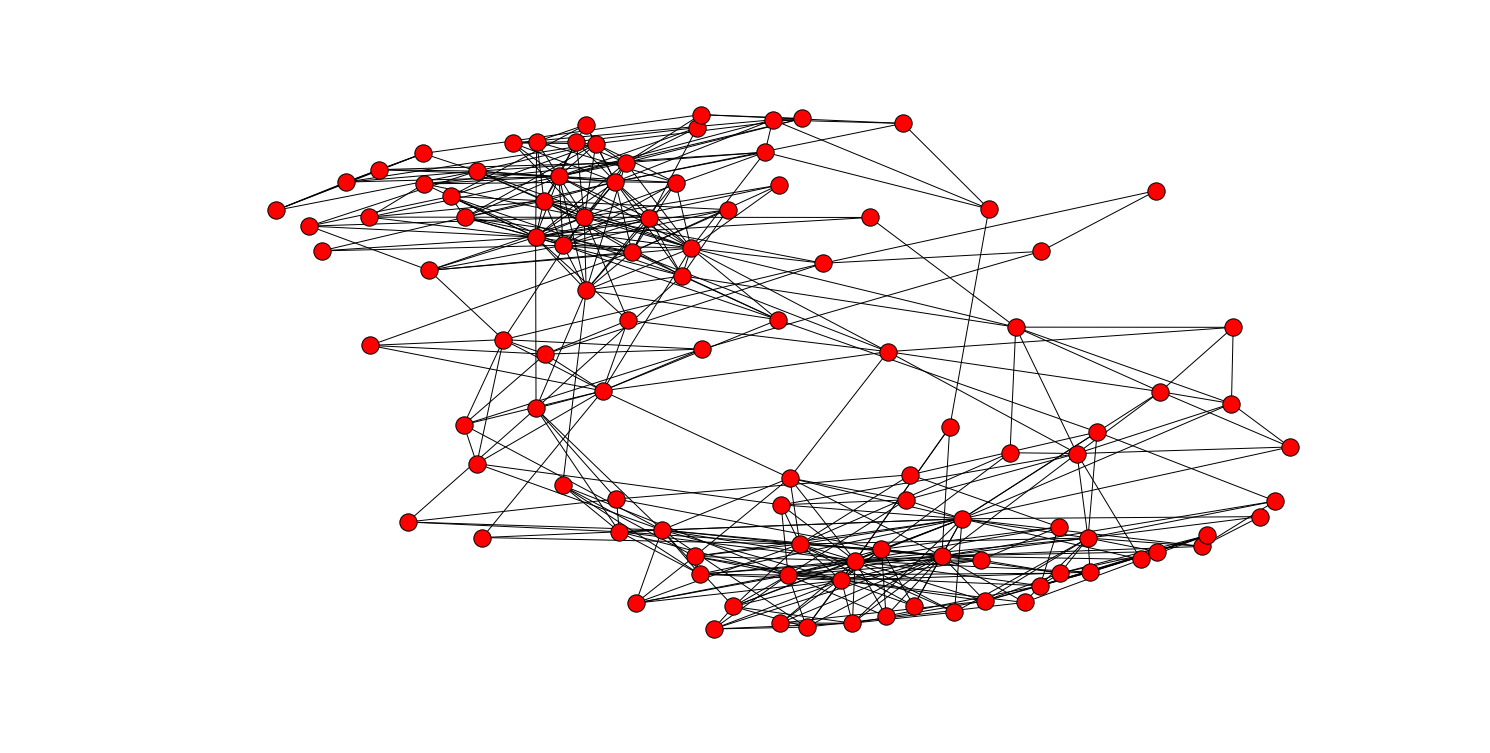

In [6]:
plt.figure(figsize=(20, 10))
drawing.draw_spring(H)

# 2. Functions

In [7]:
def trim_graph(G, keep=0.25):
    """Remove nodes that have low betweenness centrality."""
    
    # TODO: get rid of mean computations - I don't think it's necessary
    # given theat I'm working with frequencies anyway
    
    Gt = G.copy()
    
    rankings = nx.betweenness_centrality(Gt)
    means = [(v / len(rankings)) for x, v in rankings.items()]
    ind, vals, _ = plt.hist(means, bins = 20, alpha=0.5)
    
    def find_index(ind, keep):
    
        discard = np.floor(sum(ind) * (1 - keep))
        return np.cumsum(ind) > discard
    
    # ignore the first value in vals because it's 0, i.e. the left bracket
    threshold = vals[1:][find_index(ind, 0.25)][0]
    
    plt.title('Histogram of mean betweenness centralities')
    plt.show()
    
    for i, node in enumerate(Gt.nodes()):
        
        if (rankings[node] / len(rankings)) < threshold:
            
            Gt.remove_node(node)
    
    return Gt, ind, vals

In [8]:
def trim_graph_degree(G, threshold):
    
    Gt = G.copy()
    
    degs = G.degree()
    nodes = G.nodes()
    
    for i, v in enumerate(nodes):
        
        if degs[v] < threshold:
            Gt.remove_node(v)
        else:
            print(v, degs[v])
    return Gt

In [9]:
def add_colors(G):
    """Assign different colours to different labels.
    
    The labels are: 'neutral', 'conservative' and 'liberal.
    """
    val_map = [G.nodes(data=True)[i][1] for i in np.arange(len(G.nodes()))]
    values = [i['value'] for i in val_map]
    color_dict = {'n': 'beige', 'l': 'blue', 'c': 'red'}
    return [color_dict[i] for i in values]

In [10]:
def add_legend_labels(G):
    
    val_map = [G.nodes(data=True)[i][1] for i in np.arange(len(G.nodes()))]
    values = [i['value'] for i in val_map]
    label_dict = {'n': 'neutral', 'l': 'liberal', 'c': 'conservative'}
    return [label_dict[i] for i in values]

# 3. Results

## Part I: Trim nodes that have low betweenness centrality

In [11]:
spring_pos = nx.spring_layout(H)

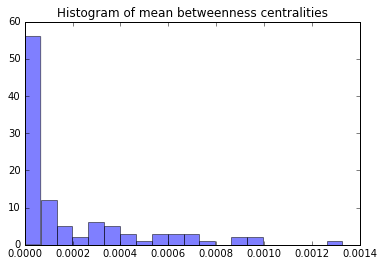

In [12]:
H_new, ind, vals = trim_graph(H, keep=0.20)

In [13]:
H_colors = add_colors(H)

In [14]:
H_new_colors = add_colors(H_new)

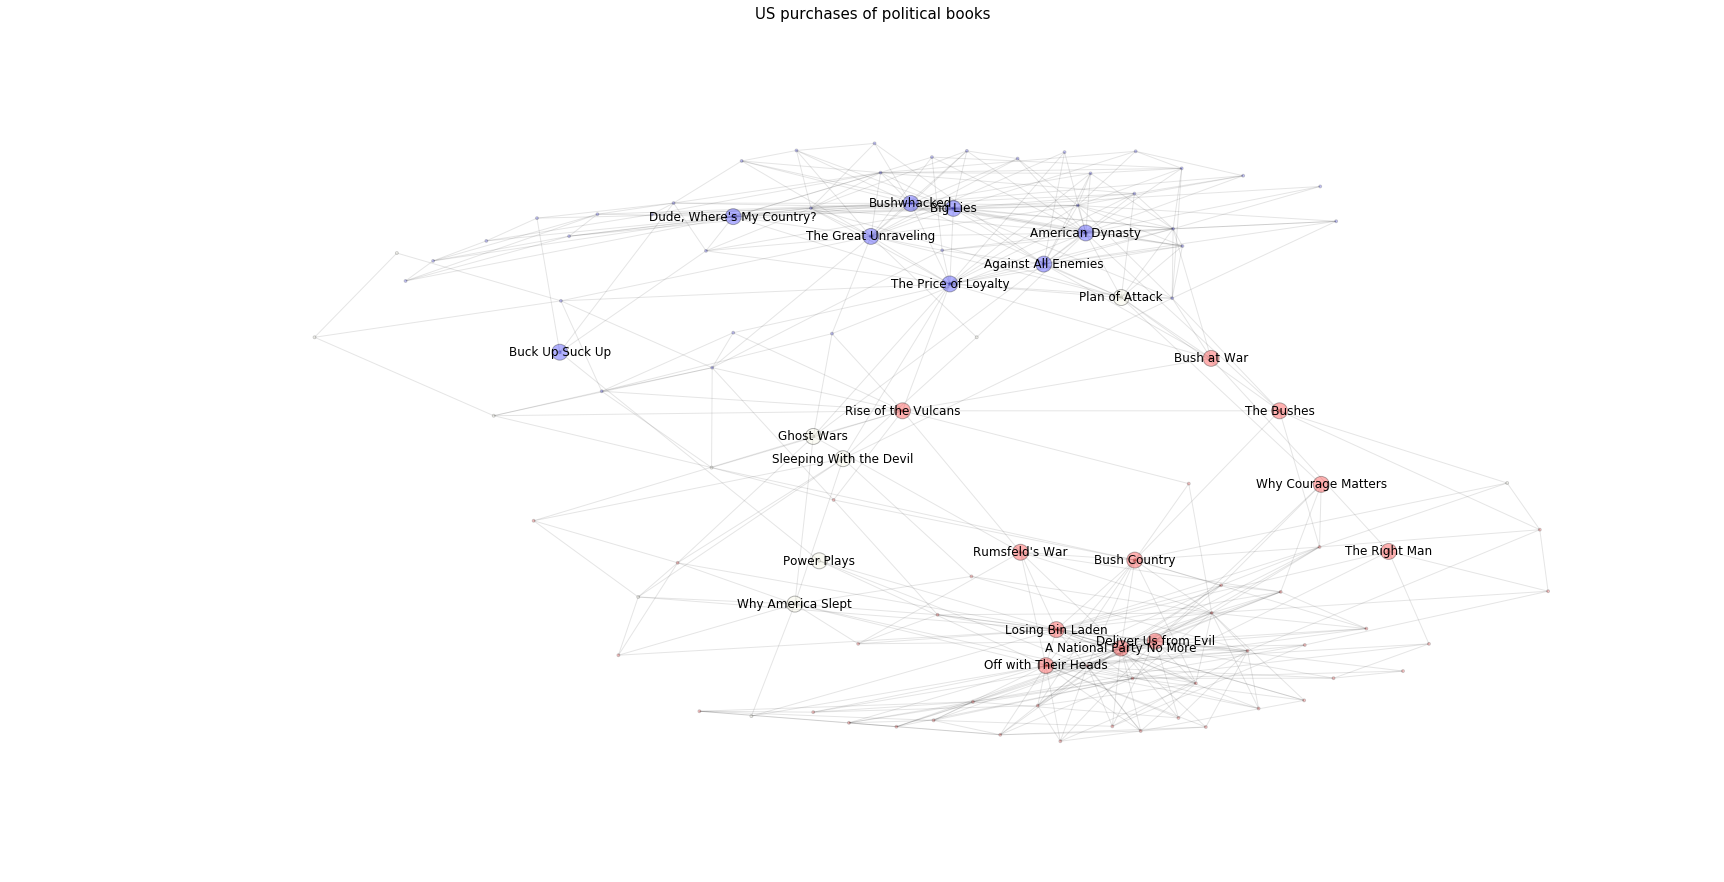

In [15]:
plt.figure(figsize=(30, 15))

# draw the nodes and the edges (all)
nx.draw_networkx_nodes(H, spring_pos, node_color=H_colors, alpha=0.2, node_size=8)
nx.draw_networkx_edges(H, spring_pos, alpha=0.1)

# draw the most important nodes with a different style
nx.draw_networkx_nodes(H_new, spring_pos, node_color=H_new_colors, alpha=0.3, node_size=254)

# also the labels this time
nx.draw_networkx_labels(H_new, spring_pos, font_size=12)
plt.title('US purchases of political books', size=15)
plt.axis('off')
plt.show()

Next, let's try the same as the above but with degrees instead of betweenness centrality. 

## Part II: highlight nodes with higher degrees but display the entire network

In [16]:
H_colors = add_colors(H)

In [17]:
H_legend_labels = add_legend_labels(H)

In [18]:
H_new = trim_graph_degree(H, 15)

Against All Enemies 15
Deliver Us from Evil 18
Legacy 18
Dereliction of Duty 15
Losing Bin Laden 23
Bushwhacked 23
American Dynasty 22
Big Lies 21
The Price of Loyalty 20
Off with Their Heads 25
A National Party No More 25
The Lies of George W. Bush 16
Bush Country 16
The Great Unraveling 21
Worse Than Watergate 16
Arrogance 18


In [19]:
spring_pos = nx.spring_layout(H)

In [20]:
degs = H.degree()

In [21]:
node_sizes = [degs[v] * 40 for v in H.nodes()]

For a legend to work I need to iterate through the nodes types. **[TODO: write function to automate the following few cells.]**

In [22]:
red_index = [i  for (i, j) in enumerate(H_colors) if j == 'red' ]
blue_index = [i for (i, j) in enumerate(H_colors) if j == 'blue']
white_index = [i for (i, j) in enumerate(H_colors) if j == 'beige']

In [24]:
red_nodes = [H.nodes()[i] for i in red_index]
H_red = nx.Graph()
H_red.add_nodes_from(red_nodes)

In [25]:
blue_nodes = [H.nodes()[i] for i in blue_index]
H_blue = nx.Graph()
H_blue.add_nodes_from(blue_nodes)

In [26]:
white_nodes = [H.nodes()[i] for i in white_index]
H_white = nx.Graph()
H_white.add_nodes_from(white_nodes)

In [29]:
# [node_sizes[i] for i in white_index]

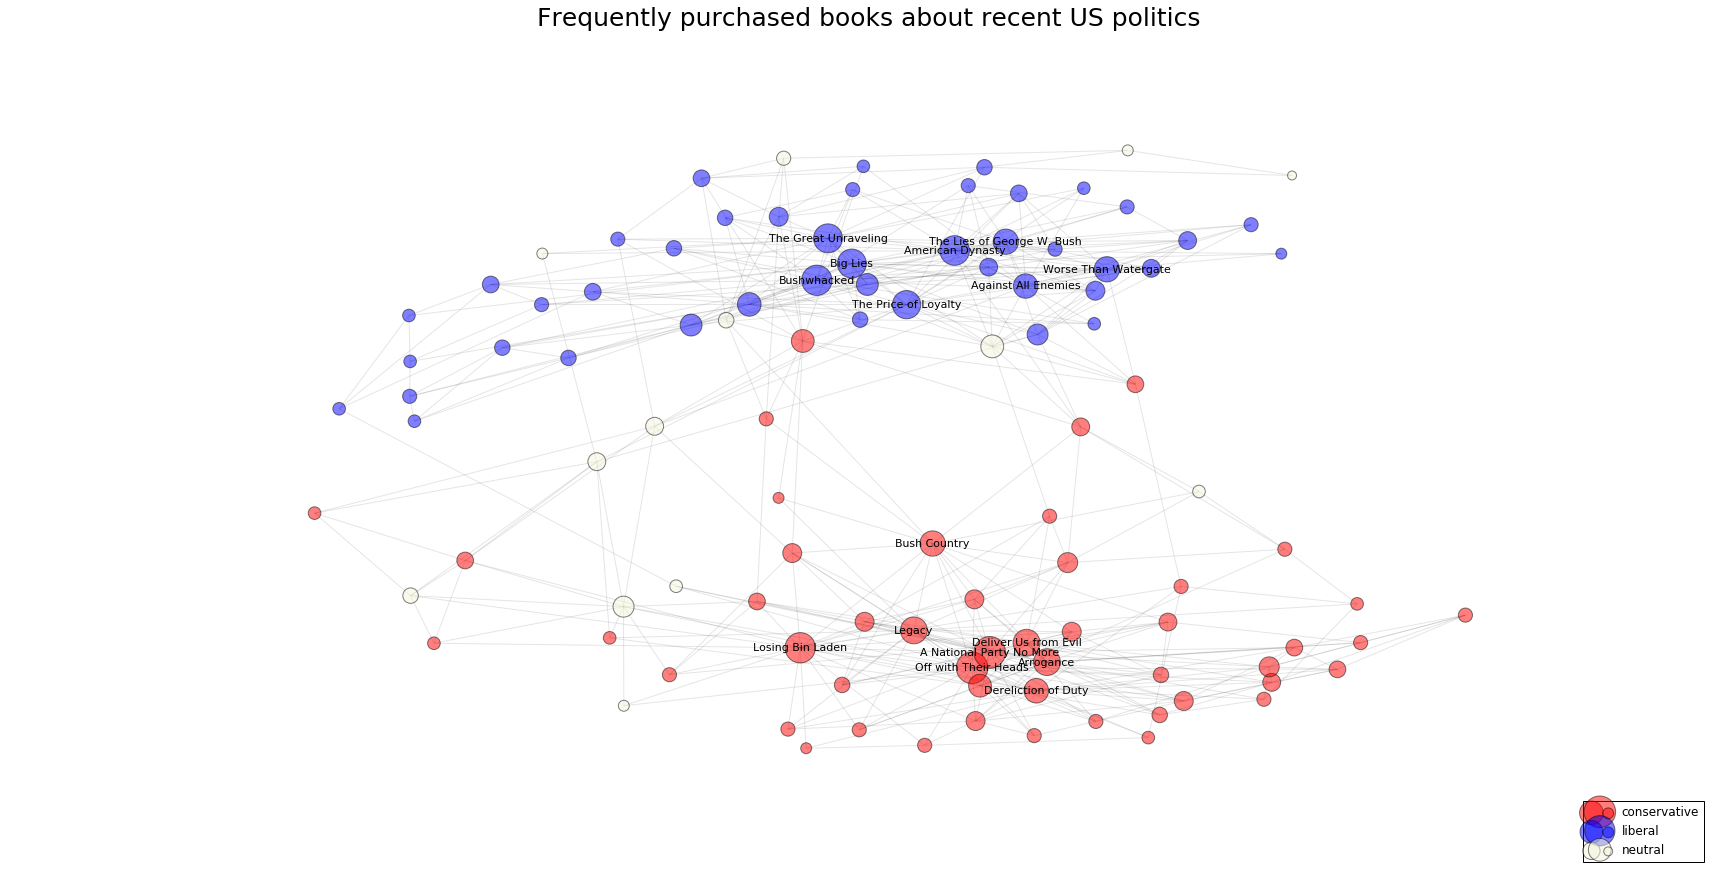

In [30]:
plt.figure(figsize=(30, 15))

nx.draw_networkx_edges(H, spring_pos, alpha=0.1)

red = nx.draw_networkx_nodes(H_red, spring_pos, node_color=[H_colors[i] for i in red_index], alpha=0.5, 
                                                        node_size=[degs[v] * 40 for v in H_red.nodes()],
                             label='conservative')
blue = nx.draw_networkx_nodes(H_blue, spring_pos, node_color=[H_colors[i] for i in blue_index], alpha=0.5, 
                              node_size=[degs[v] * 40 for v in H_blue.nodes()],
                             label='liberal')
white = nx.draw_networkx_nodes(H_white, spring_pos, node_color=[H_colors[i] for i in white_index], alpha=0.5, 
                               node_size=[degs[v] * 40 for v in H_white.nodes()],
                             label='neutral')

# also the labels this time
nx.draw_networkx_labels(H_new, spring_pos, font_size=11)

plt.title('Frequently purchased books about recent US politics ', size=25)
plt.axis('off')
plt.legend(loc='lower right')

# plt.savefig('US_politics_books.png')
plt.show()